## Read and organize data

In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
# path to parent directory of this script
#script_folder = Path(__file__).absolute().parent
# path to the file to read data from
file_location ='./object_data.csv'
# dataframes to store data
pre_post_time_df=pd.DataFrame(columns=['sim_id','end_msg', 'time_pre_hit', 'time_post_hit'])
box_properties_df=pd.DataFrame(columns=['sim_id','end_msg','size_x','size_y','size_z','com_x','com_y','com_z','mass','mu','mu2','izz'])
pre_hit_joints_df=pd.DataFrame(columns=['sim_id','end_msg','0','1','2','3','4','5','6'])
post_hit_joints_df=pd.DataFrame(columns=['sim_id','end_msg', '0','1','2','3','4','5','6'])
pre_hit_ee_df=pd.DataFrame(columns=['sim_id','end_msg', 'pos_x','pos_y','pos_z','quat_x','quat_y','quat_z','quat_w','roll','pitch','yaw','vel_x','vel_y','vel_z','ang_vel_x','ang_vel_y','ang_vel_z'])
post_hit_ee_df=pd.DataFrame(columns=['sim_id','end_msg', 'pos_x','pos_y','pos_z','quat_x','quat_y','quat_z','quat_w','roll','pitch','yaw','vel_x','vel_y','vel_z','ang_vel_x','ang_vel_y','ang_vel_z'])
pred_stop_pos_df=pd.DataFrame(columns=['sim_id','end_msg', 'time','pos_x','pos_y','pos_z'])
pre_hit_object_df=pd.DataFrame(columns=['sim_id','end_msg', 'time','pos_x','pos_y','pos_z','theta','vel_x','vel_y','vel_z','theta_dot'])
post_hit_object_df=pd.DataFrame(columns=['sim_id','end_msg', 'time','pos_x','pos_y','pos_z','theta','vel_x','vel_y','vel_z','theta_dot'])
post_hit_trajectory_df=pd.DataFrame(columns=['sim_id','end_msg', 'time','pos_x','pos_y','pos_z','theta','vel_x','vel_y','vel_z','theta_dot'])


In [3]:
def add_line(df,line,sim_id):
    line=[float(x) for x in line]
    line.insert(0,sim_id) # sim_id column
    line.insert(1,-1) # end_msg column initialized with -1
    new_df_line=pd.DataFrame([line],columns=df.columns)
    return pd.concat([df,new_df_line],ignore_index=True)

def set_end_msg(sim_id,end_type):
    '''
    this function specify the type of end message that the simulation stopped with in the column end_msg
    '''
    pre_post_time_df.loc[pre_post_time_df['sim_id']==sim_id, ['end_msg']] = end_type
    box_properties_df.loc[box_properties_df['sim_id']==sim_id, ['end_msg']] = end_type
    pre_hit_joints_df.loc[pre_hit_joints_df['sim_id']==sim_id, ['end_msg']] = end_type
    post_hit_joints_df.loc[post_hit_joints_df['sim_id']==sim_id, ['end_msg']] = end_type
    pre_hit_ee_df.loc[pre_hit_ee_df['sim_id']==sim_id, ['end_msg']] = end_type
    post_hit_ee_df.loc[post_hit_ee_df['sim_id']==sim_id, ['end_msg']] = end_type
    pred_stop_pos_df.loc[pred_stop_pos_df['sim_id']==sim_id, ['end_msg']] = end_type
    pre_hit_object_df.loc[pre_hit_object_df['sim_id']==sim_id, ['end_msg']] = end_type
    post_hit_object_df.loc[post_hit_object_df['sim_id']==sim_id, ['end_msg']] = end_type
    post_hit_trajectory_df.loc[post_hit_trajectory_df['sim_id']==sim_id, ['end_msg']] = end_type
    
def delete_sim(sim_ids):
    '''
    this function deletes the dataframes' rows of the simulation with the ids in parameter 
    '''
    pre_post_time_df.drop(pre_post_time_df[pre_post_time_df.sim_id.isin(sim_ids)].index, inplace=True)
    box_properties_df.drop(box_properties_df[box_properties_df.sim_id.isin(sim_ids)].index, inplace=True)
    pre_hit_joints_df.drop(pre_hit_joints_df[pre_hit_joints_df.sim_id.isin(sim_ids)].index, inplace=True)
    post_hit_joints_df.drop(post_hit_joints_df[post_hit_joints_df.sim_id.isin(sim_ids)].index, inplace=True)
    pre_hit_ee_df.drop(pre_hit_ee_df[pre_hit_ee_df.sim_id.isin(sim_ids)].index, inplace=True)
    post_hit_ee_df.drop(post_hit_ee_df[post_hit_ee_df.sim_id.isin(sim_ids)].index, inplace=True)
    pred_stop_pos_df.drop(pred_stop_pos_df[pred_stop_pos_df.sim_id.isin(sim_ids)].index, inplace=True)
    pre_hit_object_df.drop(pre_hit_object_df[pre_hit_object_df.sim_id.isin(sim_ids)].index, inplace=True)
    post_hit_object_df.drop(post_hit_object_df[post_hit_object_df.sim_id.isin(sim_ids)].index, inplace=True)
    post_hit_trajectory_df.drop(post_hit_trajectory_df[post_hit_trajectory_df.sim_id.isin(sim_ids)].index, inplace=True)

df_choices = {'pre_post_time': pre_post_time_df,
           'box_properties': box_properties_df,
           'pre_hit_joints': pre_hit_joints_df,
           'post_hit_joints': post_hit_joints_df,
           'pre_hit_ee': pre_hit_ee_df,
           'post_hit_ee': post_hit_ee_df,
           'pred_stop_pos': pred_stop_pos_df,
           'pre_hit_object': pre_hit_object_df,
           'post_hit_object': post_hit_object_df,
           'post_hit_trajectory:': post_hit_trajectory_df,
           'end': 'end',
           }
end_choices = {' free v=0':0,
               ' free m3':1,
               ' reset':2,
               ' stopped':3,   
            }
bug=False
bug_num=0
error_num=0
track=False
sim_id=0
first_end=True
end_type=-1
post_empty_line=False

In [4]:
with open(file_location, 'r') as f:          # read lines separately
    reader = csv.reader(f, delimiter=',')
    for i, line in enumerate(reader):
        if line : # if line not empty
            #print(i,line)
            if line[0] == 'end':
                track=False
                if first_end:
                    first_end=False
                    continue
                elif post_empty_line:
                    #delete the last simulation of each run because it's incomplete
                    delete_sim([sim_id-1])
                    post_empty_line=False
                    continue
                elif bug:
                    bug=False
                    post_empty_line=False
                    continue
                else:
                    end_type = end_choices.get(line[1])
                    if end_type is None : error_num+=1
                    set_end_msg(sim_id,end_type)
                    #print(i,'end of sim ',sim_id,'with',line[1],' ',end_type)
                    sim_id+=1
            elif line[0] == 'post_hit_trajectory:':
                #print(i,' tracking will start')
                track=True
                post_empty_line=False
                continue
            elif track:
                post_hit_trajectory_df=add_line(post_hit_trajectory_df,line,sim_id)
            elif (track==False) and (df_choices.get(line[0]) is None):
                print(i+1,' bug')
                bug_num+=1
                bug=True
                #after bug there is a line that begins with end
            else:
                if(line[0]=='pre_post_time') : pre_post_time_df=add_line(pre_post_time_df,line[1:],sim_id)
                elif(line[0]=='box_properties') : box_properties_df=add_line(box_properties_df,line[1:],sim_id)
                elif(line[0]=='pre_hit_joints') : pre_hit_joints_df=add_line(pre_hit_joints_df,line[1:],sim_id)
                elif(line[0]=='post_hit_joints') : post_hit_joints_df=add_line(post_hit_joints_df,line[1:],sim_id)
                elif(line[0]=='pre_hit_ee') : pre_hit_ee_df=add_line(pre_hit_ee_df,line[1:],sim_id)
                elif(line[0]=='post_hit_ee') : post_hit_ee_df=add_line(post_hit_ee_df,line[1:],sim_id)
                elif(line[0]=='pred_stop_pos') : pred_stop_pos_df=add_line(pred_stop_pos_df,line[1:],sim_id)
                elif(line[0]=='pre_hit_object') : pre_hit_object_df=add_line(pre_hit_object_df,line[1:],sim_id)
                elif(line[0]=='post_hit_object') : post_hit_object_df=add_line(post_hit_object_df,line[1:],sim_id)
                #print(data)
            post_empty_line=False               
        else:
            post_empty_line=True
            #print(i," empty line")

1448  bug
9940  bug
10223  bug
10830  bug
11681  bug
28687  bug
29060  bug
29418  bug
29893  bug
31043  bug
32093  bug
33321  bug
33898  bug
34399  bug
35733  bug
39098  bug
39833  bug
39873  bug
40437  bug
51189  bug
52063  bug
58954  bug


In [5]:
print('end of data collection! number of simulations read :',sim_id)
print(bug_num,' bugs, ', error_num,' errors')
print(pre_post_time_df.shape,box_properties_df.shape,pre_hit_joints_df.shape,post_hit_joints_df.shape,
      pre_hit_ee_df.shape,post_hit_ee_df.shape,pred_stop_pos_df.shape,pre_hit_object_df.shape,post_hit_object_df.shape,post_hit_trajectory_df.shape  )


end of data collection! number of simulations read : 2567
22  bugs,  0  errors
(2546, 4) (2546, 12) (2546, 9) (2546, 9) (2546, 18) (2546, 18) (2546, 6) (2546, 11) (2546, 11) (27914, 11)


In [6]:
nb_0=len(post_hit_object_df[post_hit_object_df.end_msg==0]) #v=0
nb_1=len(post_hit_object_df[post_hit_object_df.end_msg==1]) #hit mode
nb_2=len(post_hit_object_df[post_hit_object_df.end_msg==2]) #reset
nb_3=len(post_hit_object_df[post_hit_object_df.end_msg==3]) #stopped
total=len(post_hit_object_df)

print('simulations ended with v0',nb_0)
print('simulations ended with hit mode',nb_1)
print('simulations ended with stopped',nb_3)
print('simulations ended with reset',nb_2)
print('total number of simulations: ',total)
print('total usefull simulations: ',total-nb_2-nb_3)

simulations ended with v0 1
simulations ended with hit mode 2496
simulations ended with stopped 32
simulations ended with reset 17
total number of simulations:  2546
total usefull simulations:  2497


In [7]:
# drop the simulations that end with 'stopped' or reset 
ids_to_drop=list(post_hit_object_df[~post_hit_object_df.end_msg.isin([0, 1])].sim_id)
delete_sim(ids_to_drop)
post_hit_object_df

,sim_id,end_msg,time,pos_x,pos_y,pos_z,theta,vel_x,vel_y,vel_z,theta_dot
0,0,1,3.912,0.549746,-0.392283,0.165000,0.001144,-0.016881,0.531760,0.003855,0.112736
1,1,1,5.572,0.544664,0.153506,0.165000,0.000870,0.012707,-0.573172,0.005198,0.128608
2,2,1,7.162,0.541010,-0.341818,0.164996,0.003741,-0.035960,0.591660,-0.003860,0.257084
3,3,1,8.802,0.545044,0.197883,0.165000,0.002211,0.028519,-0.568039,0.004609,0.258527
4,4,1,10.422,0.544487,-0.325656,0.165000,0.003707,-0.035582,0.590104,0.003746,0.529514
...,...,...,...,...,...,...,...,...,...,...,...
2541,2562,1,537.563,0.544176,0.271015,0.164997,0.030599,-0.012734,-0.510231,-0.002801,-0.931129
2542,2563,1,539.203,0.541301,-0.269336,0.165000,-0.008840,-0.023821,0.574031,0.003676,0.852427
2543,2564,1,540.833,0.538322,0.265571,0.164996,0.008942,-0.029059,-0.588666,-0.003738,-0.204051
2544,2565,1,542.463,0.538532,-0.264310,0.164996,-0.007857,0.039315,0.610824,-0.003597,-0.312522


In [8]:
# Only take the simulations that have a corresponding end pose
# Those simulations have consecutive sim_id
first_trajectory_pos=post_hit_object_df[post_hit_object_df.sim_id.diff(periods=-1)==-1].iloc[:, 3:]
first_trajectory_pos

,pos_x,pos_y,pos_z,theta,vel_x,vel_y,vel_z,theta_dot
0,0.549746,-0.392283,0.165000,0.001144,-0.016881,0.531760,0.003855,0.112736
1,0.544664,0.153506,0.165000,0.000870,0.012707,-0.573172,0.005198,0.128608
2,0.541010,-0.341818,0.164996,0.003741,-0.035960,0.591660,-0.003860,0.257084
3,0.545044,0.197883,0.165000,0.002211,0.028519,-0.568039,0.004609,0.258527
4,0.544487,-0.325656,0.165000,0.003707,-0.035582,0.590104,0.003746,0.529514
...,...,...,...,...,...,...,...,...
2540,0.548162,-0.278106,0.165000,-0.012105,-0.024882,0.531548,0.003520,0.927565
2541,0.544176,0.271015,0.164997,0.030599,-0.012734,-0.510231,-0.002801,-0.931129
2542,0.541301,-0.269336,0.165000,-0.008840,-0.023821,0.574031,0.003676,0.852427
2543,0.538322,0.265571,0.164996,0.008942,-0.029059,-0.588666,-0.003738,-0.204051


In [9]:
object_last_pos=post_hit_trajectory_df.drop_duplicates(subset='sim_id', keep='last')
last_trajectory_pos=object_last_pos[object_last_pos.sim_id.diff(periods=-1)==-1].iloc[:, 3:]
#last_trajectory_pos

In [10]:
# Only take the simulations that have a corresponding first pose
end_pos=pre_hit_object_df[pre_hit_object_df.sim_id.diff(periods=1)==1].iloc[:, 3:]
end_pos

,pos_x,pos_y,pos_z,theta,vel_x,vel_y,vel_z,theta_dot
1,0.544362,0.164311,0.164994,-0.002345,-2.132440e-03,0.000290,-0.005545,-7.422800e-08
2,0.542186,-0.360492,0.164997,-0.009781,4.954050e-07,-0.000254,-0.000059,3.948910e-04
3,0.544371,0.208369,0.164996,-0.003110,3.182660e-03,-0.000002,0.000252,1.754260e-04
4,0.545381,-0.340595,0.164997,-0.013830,1.763940e-06,-0.003682,-0.000335,5.481570e-04
5,0.542682,0.222710,0.164996,0.021115,-1.048020e-05,0.006482,-0.000157,-1.041880e-03
...,...,...,...,...,...,...,...,...
2541,0.544322,0.276469,0.164992,0.041264,1.178090e-04,0.003561,-0.003159,-2.751680e-03
2542,0.541819,-0.281863,0.165000,-0.030011,1.118310e-04,-0.002451,0.004339,3.349360e-08
2543,0.539106,0.280674,0.164995,0.017387,1.915960e-05,0.003018,-0.000558,-9.599360e-04
2544,0.537559,-0.278416,0.164996,0.001780,7.246270e-06,-0.003583,-0.004050,-1.249280e-07


## Linear regression for object motion

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict,train_test_split

In [12]:
lr = LinearRegression() # create the model
lin_predict=pd.DataFrame()
# Predict first pose knowing end pose
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
for col in first_trajectory_pos.columns:
    lin_predict[str(col)] = cross_val_predict(lr, X=end_pos.copy(), y=first_trajectory_pos[str(col)], cv=5)


In [13]:
# predicted pose
lin_predict

,pos_x,pos_y,pos_z,theta,vel_x,vel_y,vel_z,theta_dot
0,0.544401,-0.180588,0.164998,0.002421,-0.006500,0.360622,0.000169,0.045038
1,0.542631,0.315626,0.164998,0.007477,-0.003230,-0.704100,-0.000104,-0.108204
2,0.543842,-0.217424,0.164998,0.003270,-0.004263,0.446306,0.000066,0.062365
3,0.544903,0.298263,0.164998,0.005203,0.001373,-0.666297,-0.000084,-0.151104
4,0.542747,-0.233639,0.164998,-0.000312,-0.007984,0.472465,0.000153,0.292265
...,...,...,...,...,...,...,...,...
2445,0.544036,-0.284408,0.164998,0.011759,-0.008050,0.575157,0.000338,0.359726
2446,0.542238,0.239805,0.164999,-0.007454,-0.004269,-0.536019,-0.000574,-0.150506
2447,0.540309,-0.289838,0.164998,0.003618,-0.014539,0.590872,0.000104,0.284768
2448,0.539399,0.235068,0.164999,0.006535,-0.011603,-0.526238,-0.000216,0.026511


In [14]:
# true pose
first_trajectory_pos

,pos_x,pos_y,pos_z,theta,vel_x,vel_y,vel_z,theta_dot
0,0.549746,-0.392283,0.165000,0.001144,-0.016881,0.531760,0.003855,0.112736
1,0.544664,0.153506,0.165000,0.000870,0.012707,-0.573172,0.005198,0.128608
2,0.541010,-0.341818,0.164996,0.003741,-0.035960,0.591660,-0.003860,0.257084
3,0.545044,0.197883,0.165000,0.002211,0.028519,-0.568039,0.004609,0.258527
4,0.544487,-0.325656,0.165000,0.003707,-0.035582,0.590104,0.003746,0.529514
...,...,...,...,...,...,...,...,...
2540,0.548162,-0.278106,0.165000,-0.012105,-0.024882,0.531548,0.003520,0.927565
2541,0.544176,0.271015,0.164997,0.030599,-0.012734,-0.510231,-0.002801,-0.931129
2542,0.541301,-0.269336,0.165000,-0.008840,-0.023821,0.574031,0.003676,0.852427
2543,0.538322,0.265571,0.164996,0.008942,-0.029059,-0.588666,-0.003738,-0.204051


In [15]:
print('Mean errors between the predictions and the true values')
(lin_predict-first_trajectory_pos.reset_index(drop=True)).abs().mean()

Mean errors between the predictions and the true values


pos_x        0.002320
pos_y        0.036196
pos_z        0.000002
theta        0.024758
vel_x        0.019282
vel_y        0.050991
vel_z        0.003609
theta_dot    0.534056
dtype: float64

## GMM Model for object motion

In [17]:
from sklearn.mixture import GaussianMixture
import gmr
from gmr import GMM

In [18]:
data_GMM=pd.concat([first_trajectory_pos.reset_index(drop=True),end_pos.reset_index(drop=True).add_suffix('_end')],axis=1)
data_GMM

,pos_x,pos_y,pos_z,theta,vel_x,vel_y,vel_z,theta_dot,pos_x_end,pos_y_end,pos_z_end,theta_end,vel_x_end,vel_y_end,vel_z_end,theta_dot_end
0,0.549746,-0.392283,0.165000,0.001144,-0.016881,0.531760,0.003855,0.112736,0.544362,0.164311,0.164994,-0.002345,-2.132440e-03,0.000290,-0.005545,-7.422800e-08
1,0.544664,0.153506,0.165000,0.000870,0.012707,-0.573172,0.005198,0.128608,0.542186,-0.360492,0.164997,-0.009781,4.954050e-07,-0.000254,-0.000059,3.948910e-04
2,0.541010,-0.341818,0.164996,0.003741,-0.035960,0.591660,-0.003860,0.257084,0.544371,0.208369,0.164996,-0.003110,3.182660e-03,-0.000002,0.000252,1.754260e-04
3,0.545044,0.197883,0.165000,0.002211,0.028519,-0.568039,0.004609,0.258527,0.545381,-0.340595,0.164997,-0.013830,1.763940e-06,-0.003682,-0.000335,5.481570e-04
4,0.544487,-0.325656,0.165000,0.003707,-0.035582,0.590104,0.003746,0.529514,0.542682,0.222710,0.164996,0.021115,-1.048020e-05,0.006482,-0.000157,-1.041880e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,0.548162,-0.278106,0.165000,-0.012105,-0.024882,0.531548,0.003520,0.927565,0.544322,0.276469,0.164992,0.041264,1.178090e-04,0.003561,-0.003159,-2.751680e-03
2446,0.544176,0.271015,0.164997,0.030599,-0.012734,-0.510231,-0.002801,-0.931129,0.541819,-0.281863,0.165000,-0.030011,1.118310e-04,-0.002451,0.004339,3.349360e-08
2447,0.541301,-0.269336,0.165000,-0.008840,-0.023821,0.574031,0.003676,0.852427,0.539106,0.280674,0.164995,0.017387,1.915960e-05,0.003018,-0.000558,-9.599360e-04
2448,0.538322,0.265571,0.164996,0.008942,-0.029059,-0.588666,-0.003738,-0.204051,0.537559,-0.278416,0.164996,0.001780,7.246270e-06,-0.003583,-0.004050,-1.249280e-07


In [19]:
n_components = np.arange(1, 40)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data_GMM) for n in n_components]

gmm_model_comparisons=pd.DataFrame({"n_components" : n_components,
                                  "BIC" : [m.bic(data_GMM) for m in models],
                                   "AIC" : [m.aic(data_GMM) for m in models]})
gmm_model_comparisons

,n_components,BIC,AIC
0,1,-190966.390957,-191848.575139
1,2,-250819.630723,-252589.802931
2,3,-271528.901517,-274187.061750
3,4,-249544.328302,-253090.476560
4,5,-251985.636273,-256419.772557
5,6,-252650.907396,-257973.031706
6,7,-254664.760506,-260874.872841
7,8,-269841.582653,-276939.683013
8,9,-270325.168515,-278311.256900
9,10,-279615.929793,-288490.006204


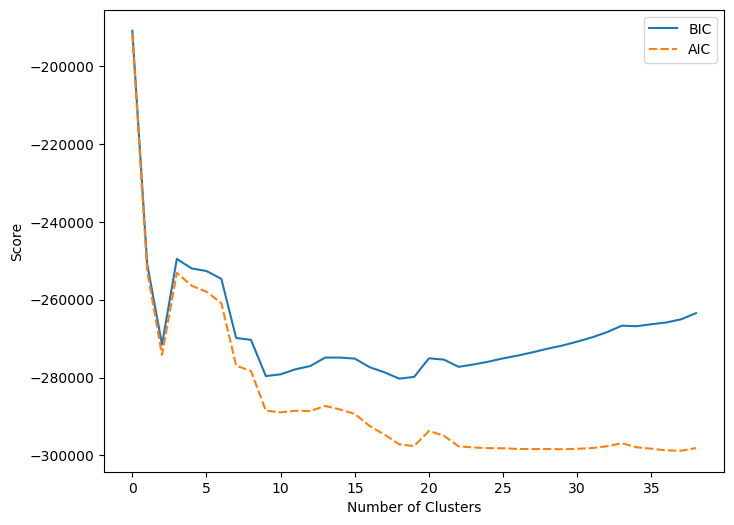

In [20]:
plt.figure(figsize=(8,6))
sns.lineplot(data=gmm_model_comparisons[["BIC","AIC"]])
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.show()

In [21]:

# Split the data into a train (70%) and a test set (30%) 
train, test = train_test_split(data_GMM, test_size=0.3, random_state=42)

# Your dataset as a NumPy array of shape (n_samples, n_features):
gmm = GMM(n_components=10, random_state=0)
gmm.from_samples(train.to_numpy())

# Predict first pose knowing end pose
# Make predictions for the first 8 features (first pose) with knowing the last 8 features (end pose):
GMM_predict = gmm.predict(np.arange(8,16),test.iloc[:,8:16].to_numpy())
GMM_predict=pd.DataFrame(GMM_predict, columns = test.iloc[:,0:8].columns)

print('Mean errors between the predictions and the true values')
(GMM_predict-test.iloc[:,0:8].reset_index(drop=True)).abs().mean()

Mean errors between the predictions and the true values


pos_x        0.001819
pos_y        0.013018
pos_z        0.000003
theta        0.013116
vel_x        0.015216
vel_y        0.032849
vel_z        0.003689
theta_dot    0.248434
dtype: float64

In [22]:
# True pose
test.iloc[:,0:8]

,pos_x,pos_y,pos_z,theta,vel_x,vel_y,vel_z,theta_dot
1290,0.541155,0.257410,0.164996,-0.056049,-0.014744,-0.583761,-0.003762,1.474540
986,0.539358,0.268750,0.165000,0.007681,0.036351,-0.575650,0.003813,0.321203
2365,0.537516,-0.264210,0.164997,-0.009580,0.034264,0.582081,-0.003311,-0.280252
642,0.546067,0.271808,0.164995,-0.008867,0.025104,-0.566265,-0.004951,0.675767
607,0.543168,-0.274919,0.165000,0.015078,0.023349,0.513729,0.003910,-0.668004
...,...,...,...,...,...,...,...,...
198,0.541311,-0.271680,0.164999,0.024859,0.018054,0.515094,-0.001474,-0.666159
561,0.549451,-0.284350,0.164997,0.015369,0.025997,0.565262,-0.002779,-0.565961
685,0.543265,-0.261817,0.165000,-0.007072,-0.028965,0.554040,0.002687,0.667858
1891,0.541195,-0.278464,0.165000,-0.008065,-0.023477,0.567753,0.003977,0.962954


In [23]:
#predicted pose
GMM_predict

,pos_x,pos_y,pos_z,theta,vel_x,vel_y,vel_z,theta_dot
0,0.540289,0.255287,0.164994,-0.038621,-0.008469,-0.604857,-0.001969,1.372388
1,0.541461,0.264324,0.165000,-0.003580,0.018111,-0.564028,0.000217,0.601333
2,0.538894,-0.270037,0.164998,0.005312,0.008598,0.566143,0.000389,-0.437233
3,0.545038,0.269517,0.164998,-0.005219,0.016703,-0.564473,0.000737,0.638611
4,0.544233,-0.276927,0.164998,0.011483,0.014547,0.575985,0.000349,-0.594795
...,...,...,...,...,...,...,...,...
730,0.541369,-0.262598,0.164998,0.008499,0.013953,0.563515,0.000476,-0.575071
731,0.549597,-0.275228,0.164998,0.013084,0.009142,0.573238,0.000287,-0.327126
732,0.542678,-0.259679,0.164998,-0.007832,-0.024008,0.563109,0.000522,0.818526
733,0.542253,-0.288261,0.164998,-0.009546,-0.028694,0.586134,0.000315,0.936681


# Guassian Process Regression 

In [24]:
from sklearn.gaussian_process import GaussianProcessRegressor
import sklearn.gaussian_process.kernels as kernels

In [25]:
X=end_pos.copy()
X_train, X_test, y_train, y_test = train_test_split(X, first_trajectory_pos, test_size=0.3, random_state=42)
y_train

,pos_x,pos_y,pos_z,theta,vel_x,vel_y,vel_z,theta_dot
550,0.546929,-0.260941,0.165000,-0.011569,-0.017672,0.564919,0.005002,1.083520
312,0.543610,-0.297782,0.164996,-0.005490,-0.029428,0.443248,-0.003565,0.274342
2116,0.545888,-0.358366,0.164998,-0.002905,-0.033793,0.604105,-0.002493,0.754334
2198,0.546853,-0.305740,0.165000,0.029484,-0.002139,0.598487,0.003896,-1.236460
904,0.539198,-0.266960,0.165000,-0.005559,-0.029368,0.577721,0.003335,0.612473
...,...,...,...,...,...,...,...,...
1719,0.541177,0.187981,0.165000,0.005567,-0.027432,-0.579543,0.003636,-0.636690
1126,0.547704,-0.268593,0.164997,0.005829,-0.027235,0.591608,-0.002584,0.161525
1161,0.542524,0.272559,0.164995,0.003433,-0.003689,-0.584913,-0.005484,0.019427
1343,0.549283,-0.351824,0.164997,-0.000299,-0.033599,0.621966,-0.002638,0.879209


In [26]:
kernel = kernels.Matern(length_scale=1e-2, length_scale_bounds=(1e-2, 1e1)) + kernels.WhiteKernel(noise_level=1e-2, noise_level_bounds=(1e-10, 1e1))
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.0)

gpr.fit(X_train.to_numpy(),y_train.to_numpy())
gpr_predict=pd.DataFrame(gpr.predict(X_test.to_numpy()), columns = first_trajectory_pos.columns)
(gpr_predict-y_test.reset_index(drop=True)).abs().mean()

pos_x        0.003286
pos_y        0.007922
pos_z        0.000790
theta        0.010029
vel_x        0.010590
vel_y        0.029116
vel_z        0.003666
theta_dot    0.183611
dtype: float64

In [27]:
gpr.kernel_

Matern(length_scale=0.304, nu=1.5) + WhiteKernel(noise_level=0.00717)